# Cardio Good Fitness Case Study - Descriptive Statistics
## Context :
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.

## Objective :
Perform descriptive analysis to create a customer profile for each CardioGood Fitness treadmill product line.

### The team identifies the following customer variables to study: 
  - Product: Product purchased - TM195, TM498, or TM798; 
  - Gender: Male or Female  
  - Age: Age of the customer in years 
  - Education: Education of the customer in years 
  - Relationship status: Single or partnered 
  - Income: Annual household income  
  - Usage: The average number of times the customer plans to use the treadmill each week 
  - Miles: average number of miles the customer expects to walk/run each week; 
  - Fitness: Self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

### Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

### Import the necessary libraries

In [96]:
# Load the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [97]:
# Load the Cardio Dataset

data = pd.read_csv('CardioGoodFitness.csv')

In [98]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [99]:
data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


### Printing the information

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [101]:
#Check missing values
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [102]:
#Check duplicate values
data.duplicated().sum()

0

**Observations:**
- There are 180 observations and 9 columns(6 of them are numerical and 3 are categorical).
- All the column have 180 non-null values i.e. there are no missing values in the data.

## Univariate Analysis

### Checking summary statistics

In [103]:
#checking analytical summary of the dataset
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


In [104]:
# Categorical -  Product,MaritalStatus
# Numerical - Age,Gender,Education,Usage,Fitness,Income,Miles

**Observations:**

- Average age of customers is 29 years. And, the age ranges from 18 to 50, indicating a good age diversity of customers.Also, half of the customers are above 26 years old.
- The average fitness score of the customers are 3.31 on a scale of 1-5,which show people who are in a good shape are more likely to buy the products.
- The average annual income of a customer is 53K. It has a range of values from 30K to 104K, which again shows a wide range and good diversity of customers.
- Average miles a customer expected to run is aorund 103, with some outliers, which may represent the presence of fitness enthusiast or some professional.
- Averge usages is for 3.4 days, while median usage is 3. Median can give a better idea, that 50% of the cutstomer are going to use the treadmill for less than or equal to 3 days in a week.  

### Plotting distribution for numerical columns

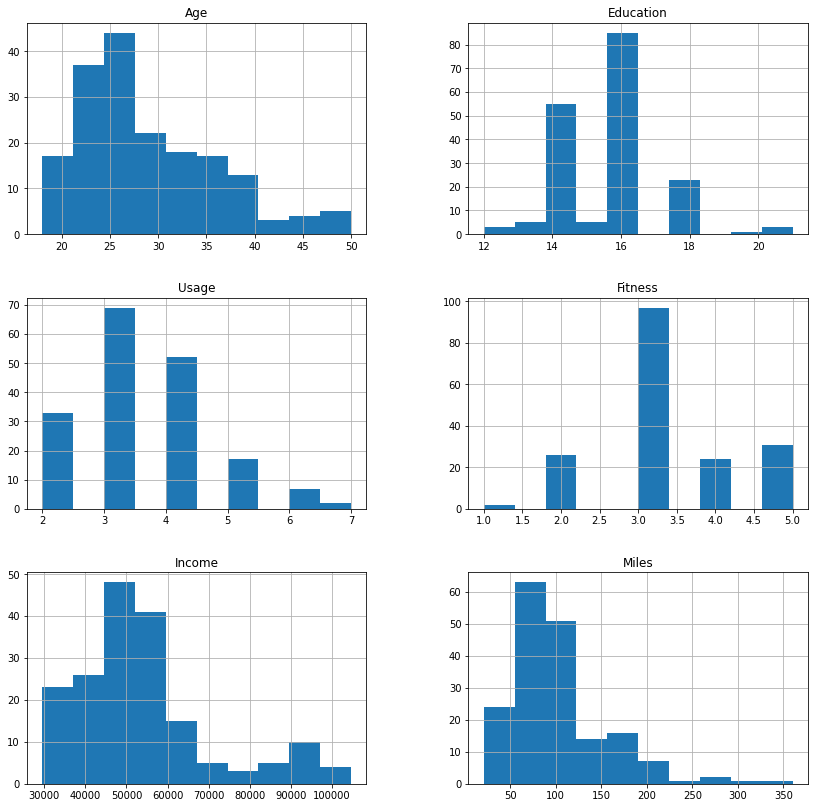

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

data.hist(figsize=(14,14))
plt.show()

# Comment about skew & kurtosis
# Age - Skewed
# Income, Miles - Skewed ,In addition has outliers as well

##### Explaination of Skew & Kurtosis

https://medium.com/swlh/skewness-and-kurtosis-in-statistics-a0314c8882d7

In [106]:
data.skew(numeric_only=True).sort_values()
# Miles, Income 
#Symmetric: Values between -0.5 to 0.5
#Moderated Skewed data: Values between -1 and -0.5 or between 0.5 and 1
#Highly Skewed data: Values less than -1 or greater than 1

Fitness      0.454800
Education    0.622294
Usage        0.739494
Age          0.982161
Income       1.291785
Miles        1.724497
dtype: float64

In [107]:
data.kurt(numeric_only=True).sort_values()
#kurtosis > 3 signifies outliers
#Miles

Fitness     -0.369228
Age          0.409710
Usage        0.542790
Education    1.033342
Income       1.373567
Miles        4.321381
dtype: float64

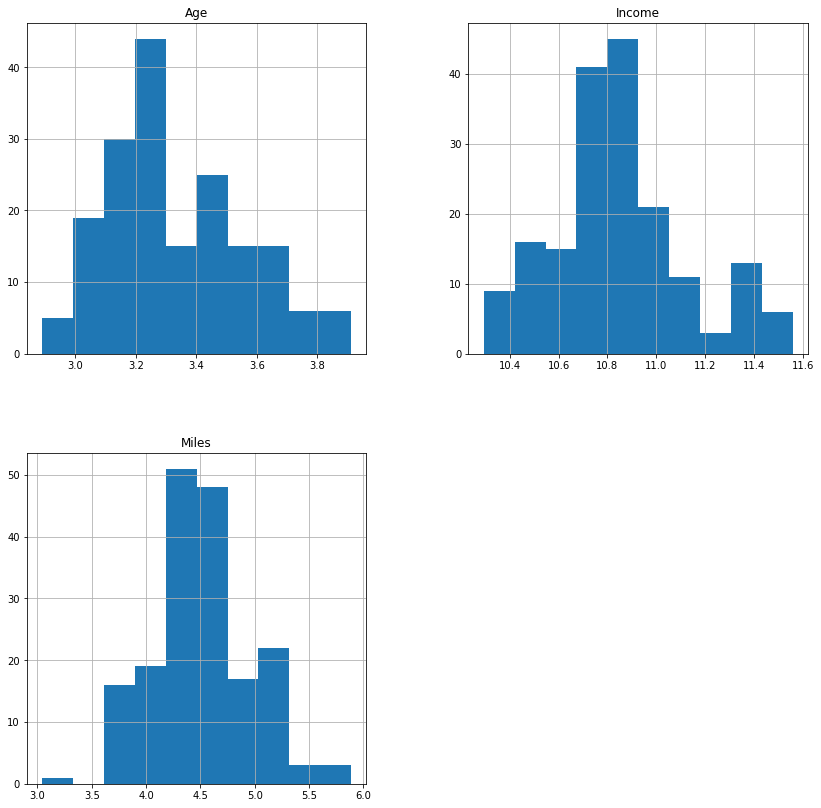

In [108]:
# Log Normal Data transformation - Assumptions for some model such as Linear Regression
np.log(data[['Age','Income','Miles']]).hist(figsize=(14,14))
plt.show()

In [109]:
np.log(data[['Age','Income','Miles']]).skew()


Age       0.528725
Income    0.566649
Miles     0.146553
dtype: float64

In [110]:
np.log(data[['Age','Income','Miles']]).kurt()

Age      -0.398619
Income    0.133259
Miles     0.333222
dtype: float64

**Observations:**
- The annual income of the people is right skewed and has a very high standard deviation.
- The range of income of people is 30k to 104k, while majority of the customers have income between 44k to 58k.
- The age distribution is also right skewed and show are few people with age greater than 40 who focus on their fitness.Most of the customers are aged between 20 to 30. 
- Most of the customers are aged between 20 to 30, which signifies the people who are young tend to but fitness products more. 
- Miles also has a right skewed, which may be dues to the people who are sports person then to have a high expected miles run/walk per week.
- The Usage plot may signify that the as the age group who buy products are working most of the people tend to use treadmill only for 3-4 days. 

#### finding a particular statistics for a particular feature

In [111]:
print(data['Age'].mean())
print(data['Age'].median())
print(data['Age'].std())

28.788888888888888
26.0
6.943498135399795


### Checking value count of each categorical column

In [112]:
cat_cols= ['Product','Gender','MaritalStatus']
for i in cat_cols:
    print(data[i].value_counts(normalize=True)) #normalized=True gives the % of each category in the column
    print('*'*40)

TM195    0.444444
TM498    0.333333
TM798    0.222222
Name: Product, dtype: float64
****************************************
Male      0.577778
Female    0.422222
Name: Gender, dtype: float64
****************************************
Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64
****************************************


In [113]:
data.columns


Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### Statistical Significant Tests

Reference Link -

https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740


<AxesSubplot:xlabel='Gender'>

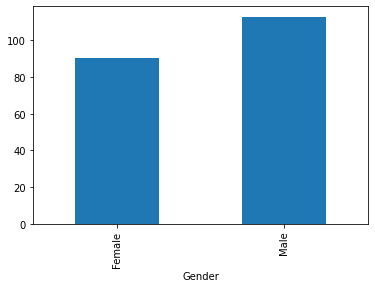

In [114]:
#Stat Significant Test -two-sample independent t-test
data.groupby(['Gender'])['Miles'].mean().T.plot.bar()

In [115]:
df0 = data.loc[data['Gender']=='Male','Miles']
df1 = data.loc[data['Gender']=='Female','Miles']
#Null Hypothesis – There is no significant difference among the groups
#Alternate Hypothesis – There is a significant difference among the groups

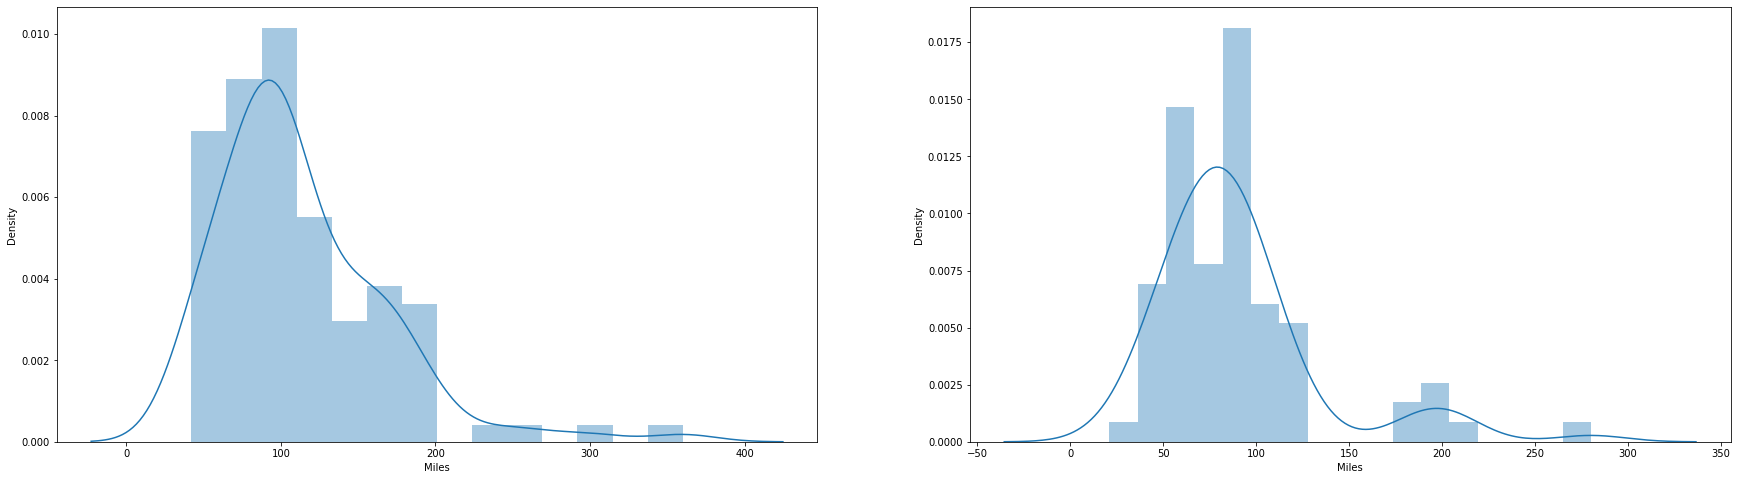

In [116]:
fig, axs = plt.subplots(ncols = 2, figsize = (30, 8))
sns.distplot(df0,kde=True, ax = axs[0])
sns.distplot(df1,kde=True, ax = axs[1])
plt.show()

In [117]:
# a two-sample independent t-test as distributions dont appear normal else we can do two sample z test
# NOTE: the p-value given is two-sided so the one-sided p value would be p/2
t, p_twosided = stats.ttest_ind(df1, df0, equal_var=False)
print("t = ",t, ", p_twosided = ", p_twosided)


t =  -3.071717181961635 , p_twosided =  0.0024672183493467436


<AxesSubplot:xlabel='Product'>

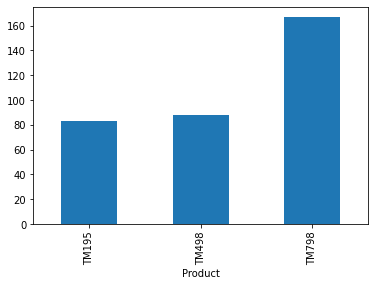

In [118]:
data.groupby(['Product'])['Miles'].mean().T.plot.bar()

In [119]:
#Statistically Significant Test for Product ( > 2 Categories) ANOVA Test
df00 = data.loc[data['Product']=="TM195",'Miles']
df11 = data.loc[data['Product']=="TM498",'Miles']
df22 = data.loc[data['Product']=="TM798",'Miles']
#Null Hypothesis – There is no significant difference among the groups
#Alternate Hypothesis – There is a significant difference among atleast two of the groups

<AxesSubplot:xlabel='Miles', ylabel='Density'>

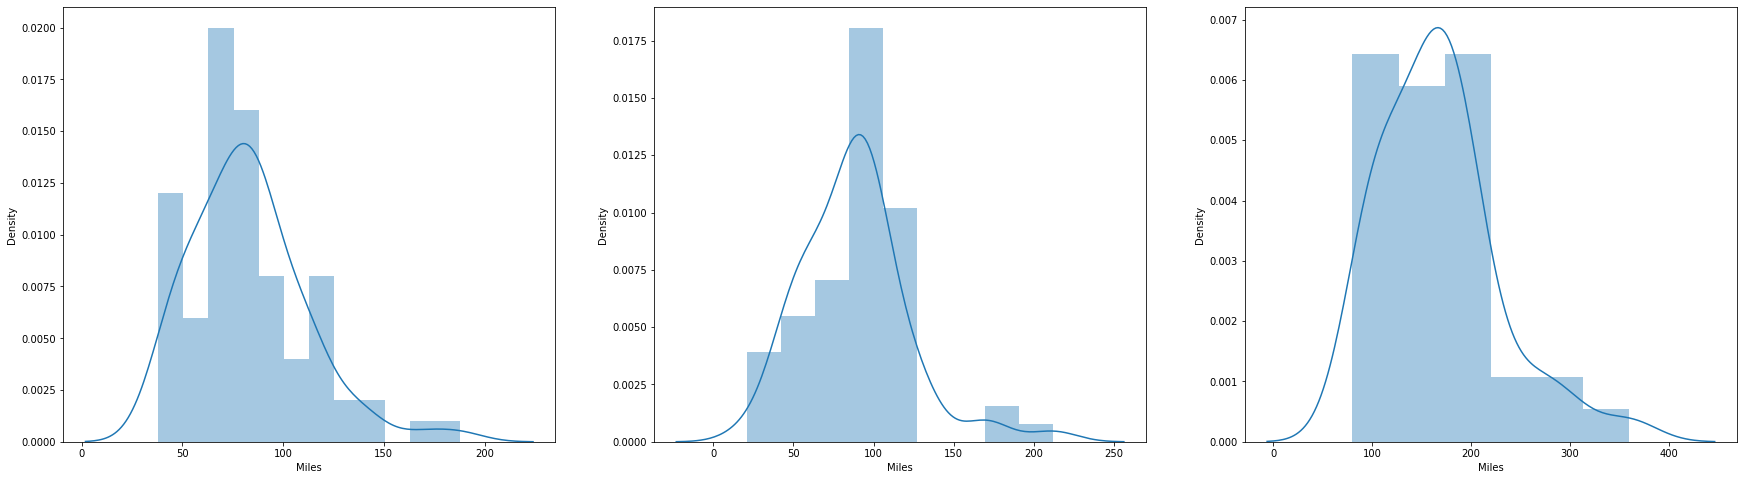

In [120]:
fig, axs = plt.subplots(ncols = 3, figsize = (30, 8))
sns.distplot(df00,kde=True, ax = axs[0])
sns.distplot(df11,kde=True, ax = axs[1])
sns.distplot(df22,kde=True, ax = axs[2])

In [121]:
F, p = stats.f_oneway(df00,df11,df22)
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.25f' % (F, p))

F-Statistic=68.242, p=0.0000000000000000000001073


In [122]:
# Chi Square Test for comparing frequencies in Categorical data
df_test = pd.crosstab(data['Product'],data['Gender'])
df_test
#Null Hypothesis – There is no significant difference among the groups
#Alternate Hypothesis – There is a significant difference among atleast two of the groups

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [123]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(df_test) #dof based on size of contigency table
print('Test-Statistic=%.3f, p=%.25f' % (stat, p))

Test-Statistic=12.924, p=0.0015617972833158713825974


In [124]:
expected

array([[33.77777778, 46.22222222],
       [25.33333333, 34.66666667],
       [16.88888889, 23.11111111]])

**Observations:**
- Most sold treadmill is TM195 is about 45%  of the customer has brought this product, while the least sold product is TM798 only 22% of the people have brought that. 
- There are about 57% of the customer who are male and rest are female. 
- 60% of the people who brought treadmill have partners and rest are single.  

## Bivariate analysis

<AxesSubplot:xlabel='Product', ylabel='count'>

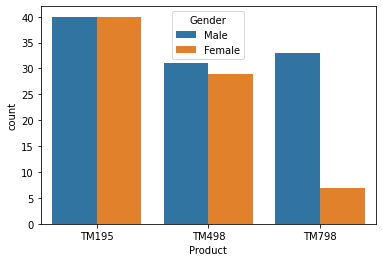

In [125]:
#product prefrence across gender
sns.countplot(x="Product", hue="Gender", data=data)

**Observation:**
- The product preference does not vary across gender except for the product TM798, which is more popular among males.
- So, gender is not a great predictor for the preference of the customer, except one product(TM798).

<AxesSubplot:title={'center':'Income'}, xlabel='Product'>

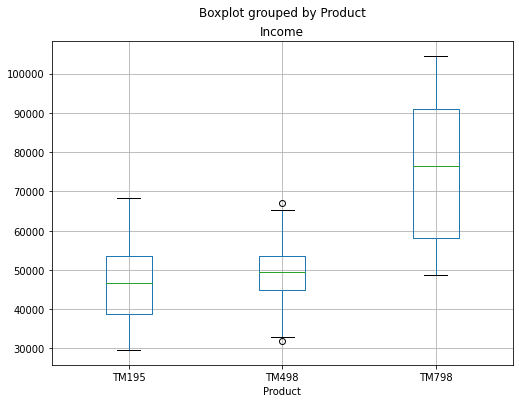

In [126]:
data.boxplot(by='Product',column = 'Income', figsize=(8,6))

- TM195 and TM498 is manily bought by the people having an income range from 30K to 70k, implying that TM195 and TM498 have lower cost and hence prefered by lower income people.
- TM798 is a premium product and is mostly consider by the people who have higher income level. 

<AxesSubplot:xlabel='Product', ylabel='Age'>

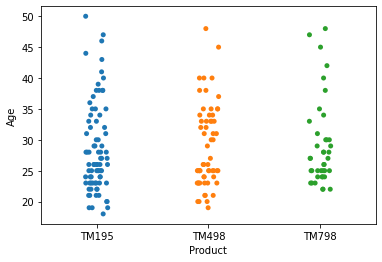

In [127]:
sns.stripplot(x='Product',y= 'Age',data=data)

**Observations:**
- TM195 and TM498 both are popular among wides age group, from 20-40. 
- TM798 is much popular in the age group of 20-30 years, signify that this product is mostly preferred by males who in the age of 20-30. 
- All the 3 products are not very popular among high age group people.

<AxesSubplot:xlabel='Product', ylabel='count'>

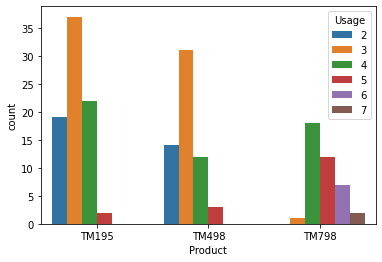

In [128]:
#Product prefernce based on the usage
sns.countplot(x="Product", hue="Usage", data=data)

**Observations:**
- TM195 and TM498 are preferred by customers who are planning to use the treadmill 2-5 times a week, signifying that these product are preferred by customers who are planning to use it moderately.
- TM798 is preferred by customers who are planning to use the treadmill 3-7 times a week.So, it is preferred by customers who will do heavy usage. 

<AxesSubplot:xlabel='Product', ylabel='count'>

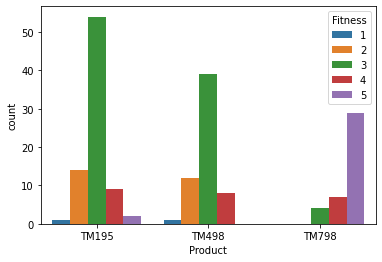

In [129]:
sns.countplot(x="Product", hue="Fitness", data=data)

**Observations:**
- TM195 is preferred by customers who rated themselves within 1 to 5. And TM498 is preferred by customers who rated themselves within 1 to 4. So, there is a wide range of fitness levels in the customers who preferred these products.
- TM798 is preferred by customers who rate themselves between 3 to 5. So, TM798 is popular among people who are very fit.

<AxesSubplot:xlabel='Product', ylabel='Miles'>

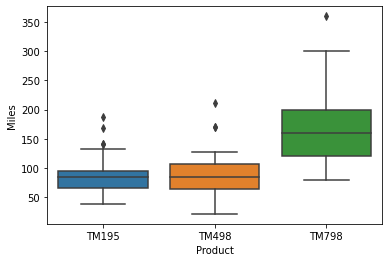

In [130]:
sns.boxplot(x='Product',y='Miles', data=data)

**Observations:**
- TM195, TM498  is bought by people who are planning to run up to 200 miles, and most buyers for both the product fall in the range where the expected run for them per week is between 40 to 150 miles with some outliers going upto 200 miles.
- TM798 is bought by people who planning to run upto 360 miles, and most buyers for this product fall in the range where the expected run for them per week is between 150 to 250 miles.

**Inference:**
- TM195 is a model for beginners and non-professional.TM498 is also having a similar characteristics.
- TM798 is a high end model preferred  mostly by the people who are professional or planning to run more number of miles. 

<AxesSubplot:xlabel='Product', ylabel='Education'>

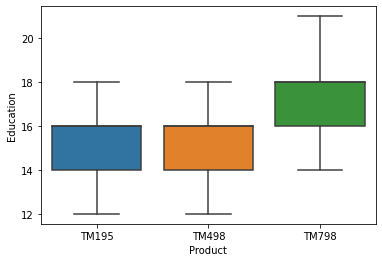

In [131]:
sns.boxplot(x='Product',y='Education', data=data)

- The product preference of the people having an education of years 12 to 16 is either TM195 or TM498. 
- The product preference for the people who have education of years from 15-20 is TM798.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

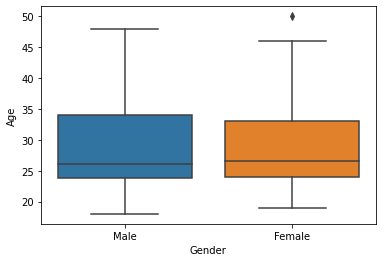

In [132]:
#checking age diversity across 
sns.boxplot(x="Gender", y="Age", data=data)

**Observation:**
- The age distribution for the people who buy treadmill is same for both male and female with a few outliers for females.

<AxesSubplot:xlabel='Gender', ylabel='Income'>

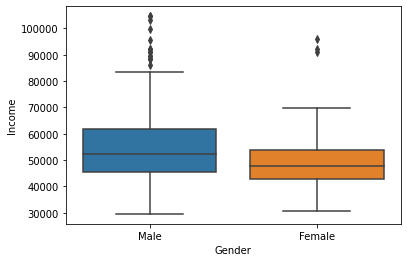

In [133]:
sns.boxplot(x="Gender", y="Income", data=data)

**Observations:**
- The data is uniformly distributed in the Interquartile Range.But, we can see outliers are present on the higher value of data.
- Customers are widely spread in the higher income range.

## Multi Variate Analysis

In [134]:
pd.crosstab(data['Product'],[data['MaritalStatus'],data['Gender']])

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
TM195                27   21     13   19
TM498                15   21     14   10
TM798                 4   19      3   14

**Observation:**
- It can be clearly seen from the table that the products TM195 and TM498 are slightly more popular among customers who are not single.
- TM798 is popular among males irrespective of there Marital status. 

In [135]:
pd.pivot_table(data,'Income', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

**Observations:**
- The average income of customers who bought TM195 and TM498 is on the lower side as compared to the customers who bought TM798.
- The people who bought TM798, there is a big difference in the income level of the people who are single or not. 

**Inference:**
- TM195 and TM498 is in lower price range and is consider by most of the people irrespective of their marital status or Gender.
- TM798 is an expensive model compared to other and is consider by the people who have partners if they have higher income levels.
- The feature Income is a good predictor to find the preference of the customers.

In [136]:
pd.pivot_table(data,'Miles', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])

MaritalStatus    Partnered      Single
Product Gender                        
TM195   Female   74.925926   78.846154
        Male     80.190476   99.526316
TM498   Female   94.000000   80.214286
        Male     87.238095   91.100000
TM798   Female  215.000000  133.333333
        Male    176.315789  147.571429

**Observations:**
- Partnered customers are planning to run more miles compared to single customers.
- Irrespective of the Marital Status, TM798 is preferred by customers who are expecting to run more miles.

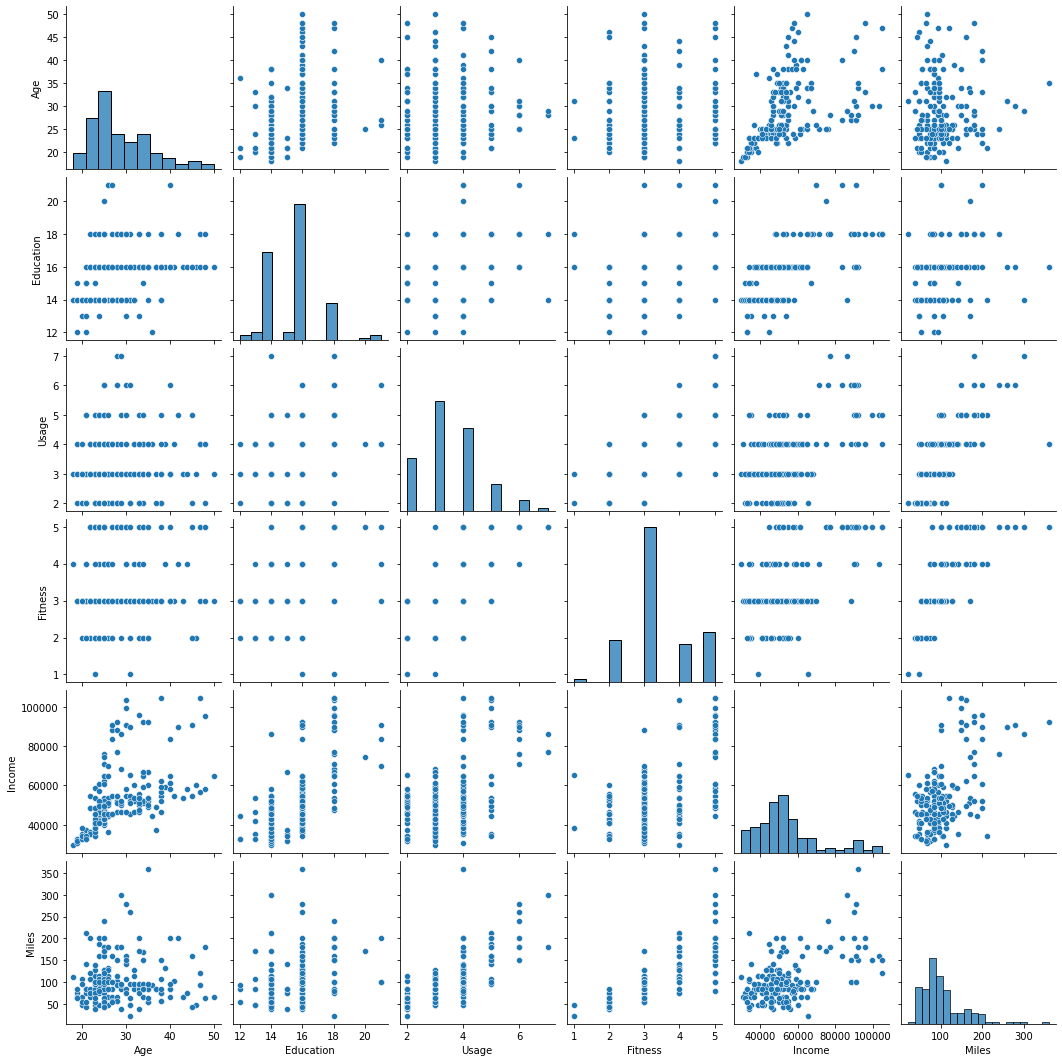

In [137]:
sns.pairplot(data)

**Observations:**
- Income and Age are positively correlated
- There is correlation between income and miles too.
- Fitness and miles have a correlation, which makes sense as fitness is derived by the amount of physical activity done by a person.

#### Let's check the exact value of this correlation between the variable using correlation martix.

Link to understand correlation 
https://en.wikipedia.org/wiki/File:Correlation_examples2.svg


In [138]:
corr = data.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

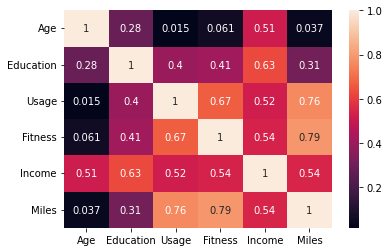

In [139]:
sns.heatmap(corr, annot=True)

**Observations:**
- Miles and Usage , Miles and Fitness are highly correlated with each other, which makes sense also, as more useage, leads to more mile hence leads better fitness.
- There is a high correlation between income and education too, signifies that the people with good education level tend to have higher income.
- Fitness and usage are also highly correlated.


### Conclusions:
- TM798 is a high-end model and is the least sold product among the three. Also, it is mostly popular among male customers, and is preferred by customers who are planning to run more, having good fitness, and higher income range.
- TM195 is a low-end product that is most popular which is preferred among customers having lower income range, lower fitness, and who plan to run less.
- TM498 is slightly less popular than TM195. It is having almost similar characteristics as TM195. Mostly preferred by customers having moderate fitness levels and low income.